In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np


In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
filepath = "cleaned.csv"
df = pd.read_csv(filepath)
# for i,x in enumerate(columnslist):
#     df[x]=df.iloc[:,i]
print(df)

       Unnamed: 0    ID  ProductName    Result  \
0               0  2401  borderlands  positive   
1               1  2401  borderlands  positive   
2               2  2401  borderlands  positive   
3               3  2401  borderlands  positive   
4               4  2401  borderlands  positive   
...           ...   ...          ...       ...   
74677       74677  9200       nvidia  positive   
74678       74678  9200       nvidia  positive   
74679       74679  9200       nvidia  positive   
74680       74680  9200       nvidia  positive   
74681       74681  9200       nvidia  positive   

                                                 Message  \
0      ['im', 'getting', 'on', 'borderlands', 'and', ...   
1      ['i', 'am', 'coming', 'to', 'the', 'borders', ...   
2      ['im', 'getting', 'on', 'borderlands', 'and', ...   
3      ['im', 'coming', 'on', 'borderlands', 'and', '...   
4      ['im', 'getting', 'on', 'borderlands', 'and', ...   
...                                    

<Axes: xlabel='Result'>

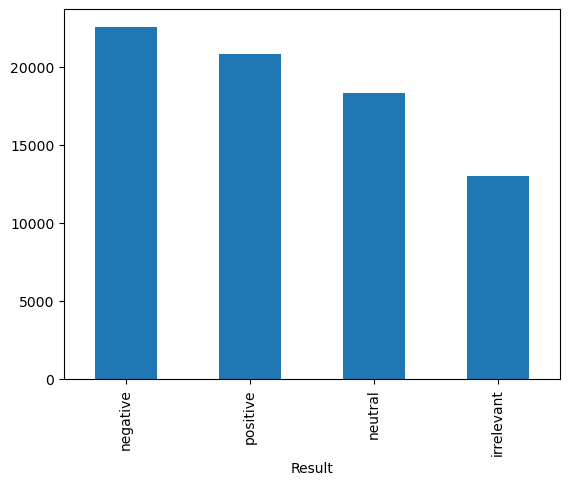

In [3]:
df.Result.value_counts().plot(kind='bar')

<Axes: xlabel='ProductName'>

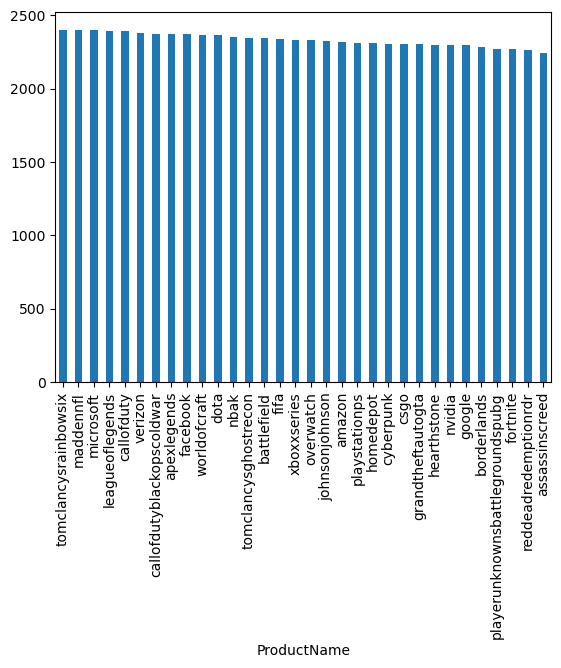

In [4]:
df.ProductName.value_counts().plot(kind='bar')

In [5]:
df.columns

Index(['Unnamed: 0', 'ID', 'ProductName', 'Result', 'Message',
       'stemmed_messages', 'lemmatized_messages'],
      dtype='object')

In [6]:
X = df.drop(columns=['Unnamed: 0','Message','stemmed_messages','Result'])


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=df['Result']
y = le.fit_transform(y)
X.ProductName = le.fit_transform(X.ProductName)


In [8]:
from collections import Counter

def bag_of_words(tokens):
  return Counter(tokens)

X['bow'] = X['lemmatized_messages'].apply(lambda tokens: bag_of_words(tokens))

In [9]:
from sklearn.feature_extraction import DictVectorizer

X_dict_vector = DictVectorizer().fit_transform(X["bow"]).toarray()

X =X.drop(columns=["lemmatized_messages"])
print(X.shape)
columnlen=X_dict_vector.shape[1]
columnlist = [f"f{column}" for column in range(columnlen)]


for i,x in enumerate(columnlist):
    X[columnlist]=X_dict_vector[i]
print(X)

(74682, 3)
         ID  ProductName                                                bow  \
0      2401            4  {'[': 1, ''': 20, 'i': 3, 'm': 2, ',': 9, ' ':...   
1      2401            4  {'[': 1, ''': 24, 'i': 4, ',': 11, ' ': 11, 'b...   
2      2401            4  {'[': 1, ''': 20, 'i': 4, 'm': 1, ',': 9, ' ':...   
3      2401            4  {'[': 1, ''': 20, 'i': 3, 'm': 3, ',': 9, ' ':...   
4      2401            4  {'[': 1, ''': 22, 'i': 3, 'm': 3, ',': 10, ' '...   
...     ...          ...                                                ...   
74677  9200           22  {'[': 1, ''': 50, 'j': 1, 'u': 1, 's': 1, 't':...   
74678  9200           22  {'[': 1, ''': 44, 'j': 1, 'u': 1, 's': 1, 't':...   
74679  9200           22  {'[': 1, ''': 48, 'j': 1, 'u': 1, 's': 1, 't':...   
74680  9200           22  {'[': 1, ''': 60, 'j': 1, 'u': 2, 's': 1, 't':...   
74681  9200           22  {'[': 1, ''': 48, 'j': 1, 'u': 2, 's': 2, 't':...   

        f0    f1   f2   f3   f4   f5   f

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1) 



In [11]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_val)


TypeError: float() argument must be a string or a real number, not 'Counter'

In [161]:
from sklearn import metrics
evaluator = metrics.accuracy_score(y_val, y_pred)
print(evaluator)

0.5197161411260628
